In [1]:
using Plots
using Statistics
using LinearAlgebra
using JSON

include("readclassjson.jl");

In [4]:
# ; wget http://ee263.stanford.edu/hw/inductor_data.json -P data/

In [6]:
# ; wget http://ee263.stanford.edu/hw/curve_smoothing.json -P data/

## 6.720 Approximate inductance formula

Approximate inductance model $\hat{L}=\alpha n^{\beta_{1}} w^{\beta_{2}} d^{\beta_{3}} D^{\beta_{4}}$ for $\alpha, \beta_{1}, \beta_{2}, \beta_{3}, \beta_{4} \in \mathbb{R}$ in $R$ and $\alpha > 0$.

The file inductor_data.json on the course web site contains data for 50 inductors. (The data is real, not that it would affect how you solve the problem ... ) For inductor $i,$ we give parameters $n_{i}, w_{i}, d_{i},$ and $D_{i}($ all in $\mu \mathrm{m}),$ and also, the inductance $L_{i}$ (in nH) obtained from measurements. (The data are organized as vectors of length 50. Thus, for example, $w_{13}$ gives the wire width of inductor $13 .$ ) Your task, i.e., , the problem, is to find $\alpha, \beta_{1}, \ldots, \beta_{4}$ so that
$$
\hat{L}_{i}=\alpha n_{i}^{\beta_{1}} w_{i}^{\beta_{2}} d_{i}^{\beta_{3}} D_{i}^{\beta_{4}} \approx L_{i} \quad \text { for } i=1, \ldots, 50
$$
Your solution must include a clear description of how you found your parameters, as well as their actual numerical values. Note that we have not specified the criterion that you use to judge the approximate model (i.e., the fit between $\hat{L}_{i}$ and $\left.L_{i}\right) ;$ we leave that to your engineering judgment. But be sure to tell us what criterion you use. We define the percentage error between $\hat{L}_{i}$ and $L_{i}$ as
$$
e_{i}=100\left|\hat{L}_{i}-L_{i}\right| / L_{i}
$$
Find the average percentage error for your model, i.e., $\left(e_{1}+\cdots+e_{50}\right) / 50 .$ (We are only asking you to find the average percentage error for your model; we do not require that your model minimize the average percentage error.) Hint: you might find it easier to work with log $L$.

In [7]:
induct = readclassjson("data/inductor_data.json")

Dict{Any,Any} with 6 entries:
  "d" => [165.45, 132.85, 64.35, 221.9, 82.05, 57.0, 34.0, 42.0, 164.0, 236.0  …
  "w" => [22.4, 21.0, 6.0, 17.6, 12.0, 3.2, 13.0, 24.0, 5.0, 5.0  …  7.0, 7.0, …
  "N" => 50
  "D" => [345.0, 325.0, 210.0, 395.0, 240.0, 180.0, 300.0, 400.0, 300.0, 300.0 …
  "L" => [5.2, 5.5, 13.7, 10.2, 6.5, 20.1, 7.6, 7.3, 23.5, 9.7  …  2.8, 12.1, 3…
  "n" => [3.75, 4.25, 9.25, 4.5, 5.75, 12.0, 7.0, 6.0, 8.0, 4.0  …  5.0, 9.0, 3…

In [15]:
lL = log.(induct["L"])
lw = log.(induct["w"])
lD = log.(induct["D"])
ld = log.(induct["d"])
ln = log.(induct["n"]);

In [35]:
size(lL)

(50,)

(1, 50)

In [19]:
intercept = ones(1,50)

1×50 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [28]:
design = [transpose(intercept) ln lw ld lD]

50×5 Array{Float64,2}:
 1.0  1.32176  3.10906  5.10867  5.84354
 1.0  1.44692  3.04452  4.88922  5.78383
 1.0  2.22462  1.79176  4.16434  5.34711
 1.0  1.50408  2.8679   5.40223  5.97889
 1.0  1.7492   2.48491  4.40733  5.48064
 1.0  2.48491  1.16315  4.04305  5.19296
 1.0  1.94591  2.56495  3.52636  5.70378
 1.0  1.79176  3.17805  3.73767  5.99146
 1.0  2.07944  1.60944  5.09987  5.70378
 1.0  1.38629  1.60944  5.46383  5.70378
 1.0  2.3979   2.19722  3.09104  5.70378
 1.0  2.07944  2.63906  2.99573  5.70378
 1.0  1.79176  2.94444  3.46574  5.70378
 ⋮                               
 1.0  2.19722  1.8718   1.60944  5.34711
 1.0  2.07944  1.79176  3.82864  5.42053
 1.0  1.60944  1.94591  3.78419  5.03695
 1.0  2.19722  1.94591  3.78419  5.52146
 1.0  1.17865  3.21888  5.01396  5.82895
 1.0  1.50408  3.13549  3.93183  5.70378
 1.0  1.09861  2.89037  5.12396  5.70378
 1.0  1.7492   2.25129  3.16758  5.24702
 1.0  1.09861  4.49981  4.91265  6.55108
 1.0  1.38629  2.77259  4.30407  5.56834


In [50]:
F = qr(design)
R = F.R
Q = F.Q
coefficients = inv(R) * transpose(Q[:,1:5]) * lL

5-element Array{Float64,1}:
 -7.2541217323302485
  1.379364507670155
 -0.4806038688513885
  0.275615953098549
  1.213171626335038

In [45]:
coefficients = inv(transpose(design) * design) * transpose(design) * lL

5-element Array{Float64,1}:
 -7.254121732328082
  1.3793645076706198
 -0.48060386885095424
  0.27561595309879255
  1.2131716263341366

In [46]:
L = induct["L"]
Lhat = exp.(design * coefficients)

50-element Array{Float64,1}:
  4.816693056661896
  5.169714756609035
 13.303608802234692
  8.886918832583243
  6.222006749426116
 20.671022967278425
  8.07571456155682
  7.3068983579024565
 23.7113929035591
 10.076114184412646
 15.943686822329685
  8.09449037927301
  5.350222163312585
  ⋮
  6.095814575405753
 10.851827525304378
  3.2685251817228176
 13.235500787489151
  3.589843508532568
  3.7320568830948884
  3.3336056432058006
  3.7257192524202813
  4.056132658908893
  3.5508719761944665
 11.004173683481907
 25.79862272786435

In [47]:
e = 100 .* abs.(Lhat - L) ./ L;
eBar = sum(e)/50

6.77002401837891

## 7.1060 Curve-smoothing 

### a)
*Explain how to find $g$ that minimizes $d+\mu c,$ where $\mu \geq 0$ is a parameter that gives the relative weighting of sum-square curvature compared to sum-square deviation. Does your method always work? If there are some assumptions you need to make (say, on rank of some matrix, independence of some vectors, etc.), state them clearly. Explain how to obtain the two extreme cases: $\mu=0,$ which corresponds to minimizing $d$ without regard for $c,$ and also the solution obtained as $\mu \rightarrow \infty(i . e .,$ as we put more and more weight on minimizing curvature).*

Let us reformat the problem to match the multi-objective least squares format $\|A x-y\|^{2}+\mu\|F x-b\|^{2}$. The first term is roughly our mean square deviation objective. We can write $d=\frac{1}{n} \sum_{i=1}^{n}\left(f_{i}-g_{i}\right)^{2}$ in vector form $$d = \frac{1}{n}||f - g||^2 = ||\frac{I}{\sqrt{n}}g - \frac{f}{\sqrt{n}}||^2$$ We can then see here $A = \frac{I}{\sqrt{n}},\, x = g, \, y = \frac{f}{\sqrt{n}}$. 

Similarly, to add a cost for curvature we can rewrite $c=\frac{1}{n-2} \sum_{i=2}^{n-1}\left(\frac{g_{i+1}-2 g_{i}+g_{i-1}}{1 / n^{2}}\right)^{2}$ as $\frac{1}{n-2} || \frac{B}{n^2}g||^2$ where B is an $n-2 \times n$ matrix 
$
B_{ij} = \begin{cases}1 & \text{if }i=j \\ -2 & \text{if }j=i+1\\1 & \text{if }j=i+2 \\ 0 & \text{else}  \end{cases} \implies B = \begin{bmatrix}1 & -2 & 1 & 0 &\cdots &0 \\ 0 & 1 & -2 & 1 &\cdots &0 \\ \vdots & \ddots & & & &\vdots \\ 0 & \cdots & 0 & 1 & -2 & 1\end{bmatrix}
$

Here we are equating $F =\frac{B}{n^2}, \, x = g, \, b=0$. Then our objective is $\underset{g}{min} \; ||\frac{I}{\sqrt{n}}g - \frac{f}{\sqrt{n}}||^2 + \frac{\mu}{n-2} ||\frac{B}{n^2}g||^2$. Following the steps from lecture 
$$
\tilde{A} = \begin{bmatrix}\frac{I}{\sqrt{n}} \\ \sqrt{\frac{\mu}{n-2}} \frac{B}{n^2}\end{bmatrix}\quad 
\tilde{y} = \begin{bmatrix}\frac{f}{\sqrt{n}} \\ 0\end{bmatrix}
$$
and the least squares solution becomes 
$$
\hat{g} =\left(\tilde{A}^{\top} \tilde{A}\right)^{-1} \tilde{A}^{\top} \tilde{y} \\
=\left(\frac{1}{n}I^{\top} I+\frac{\mu}{n-2} \frac{1}{n^4}B^{\top} B\right)^{-1}(\frac{1}{n}I^{\top}f)\\
=\frac{1}{n}(\frac{1}{n}I+\frac{\mu}{n-2} \frac{1}{n^4}B^{\top} B)^{-1}f
$$

For $\mu = 0$ then $\underset{g}{min} \; ||\frac{I}{\sqrt{n}}g - \frac{f}{\sqrt{n}}||^2 + \frac{\mu}{n-2} ||\frac{B}{n^2}g||^2 = \underset{g}{min} \; ||\frac{I}{\sqrt{n}}g - \frac{f}{\sqrt{n}}||^2$ and we have a more typical least squares objective without regularization on the curvature. We can see the solution becomes $\frac{1}{n}(\frac{1}{n}I)^{-1}f = f$ - we are able to perfectly interpolate the points of f. This makes sense since we imposed no other restrictions on the form of g (and matches the definition of a smoothing spline which we are recreating).

As $\mu \rightarrow \infty$ there is an infinite penalty on the curvature of g - therefore the function will shift to have a zero second derivative to minimize this cost. This forces g to be linear, since anything more flexible could have a non-zero second derivative. Specifically we create $X = \begin{bmatrix} 1 & 1\\ 1 & 2 \\ \vdots \\1 & n\end{bmatrix}$ where the first column is all 1's and the second a column of indices of f. Next we create a vector of coefficients $\beta = \begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}$. Then knowing that imposing $\mu \rightarrow \infty$ forces $\frac{1}{n-2} ||\frac{B}{n^2}g||^2 \rightarrow 0$, our objective can be rewritten as $\underset{g}{min} \; ||\frac{I}{\sqrt{n}}g - \frac{f}{\sqrt{n}}||^2 = \underset{\beta}{min} \; \frac{1}{n}||X\beta - f||^2$. This is a typical linear least squares criterion (say for linear regresion) with solution $\hat{\beta} = (X^TX)^{-1}X^Tf$

### b) 

In [2]:
smooth = readclassjson("data/curve_smoothing.json")
f = smooth["f"];

In [3]:
B = zeros(49, 51)
for i = 1:49
   B[i, i] = 1
   B[i, i+1] = -2
   B[i, i+2] = 1
end


In [4]:
function spline(f, B, mu)
    n = length(f)
    g = (1/n)inv(1/n .* I + mu/(n^4*(n-2)) .* (transpose(B)*B)) * f
    return g
end

spline (generic function with 1 method)

In [20]:
n = length(f)
mu = 10e20
(1/n)inv(1/n .* I + mu/(n^4*(n-2)) .* (transpose(B)*B)) * f

51-element Array{Float64,1}:
 -1.724640379298432
 -1.6647350608136189
 -1.6048297423284228
 -1.5449244238436086
 -1.4850191053582666
 -1.4251137868734995
 -1.365208468389141
 -1.3053031499042194
 -1.2453978314201333
 -1.1854925129355245
 -1.125587194451771
 -1.0656818759679916
 -1.0057765574843636
  ⋮
  0.6116670414432595
  0.671572359919434
  0.7314776783956564
  0.7913829968718971
  0.851288315348173
  0.9111936338244977
  0.9710989523008513
  1.0310042707772433
  1.0909095892536513
  1.1508149077300711
  1.2107202262064964
  1.270625544682923

In [5]:
function tradeoff(mu)
    g = spline(f, B, mu)
    J1 = (1/length(f)) * norm(f-g)
    J2 = (1/(length(f)-2)*length(f)^4) * norm(B*g)
    return [J1 J2]
end

tradeoff (generic function with 1 method)

In [6]:
mu = exp10.(range(-15, stop=20, length=50));

In [7]:
curve = tradeoff.(mu);

In [8]:
J1 = [x[1] for x in curve]
J2 = [x[2] for x in curve];

In [9]:
J2

50-element Array{Float64,1}:
 521846.4341517205
 521846.4341517205
 521846.4341517205
 521846.4341517205
 521846.4341517205
 521846.4341517205
 521846.4341517205
 521846.4341517204
 521846.4341517201
 521846.4341517179
 521846.43415170774
 521846.43415165384
 521846.43415137497
      ⋮
    155.57018414586716
     31.26093964194523
      6.08411714355243
      1.1764920808694048
      0.22721353968230504
      0.043870618497397526
      0.008470182237773256
      0.0016353484336196725
      0.0003157291496935925
      6.0954340467437486e-5
      1.1783519671862748e-5
      2.292333613263796e-6

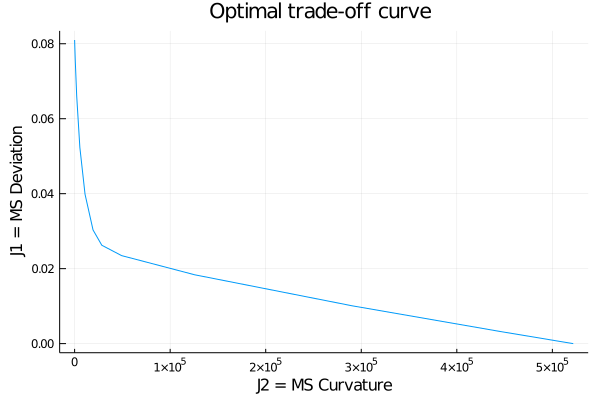

In [10]:
plot(J2, J1, legend=false)
xlabel!("J2 = MS Curvature")
ylabel!("J1 = MS Deviation")
title!("Optimal trade-off curve ")

In [11]:
@show cp1 = findall(J1 .== 0)[end]
@show mu[cp1]
@show J2[cp1]

cp1 = (findall(J1 .== 0))[end] = 6
mu[cp1] = 3.727593720314938e-12
J2[cp1] = 521846.4341517205


521846.4341517205

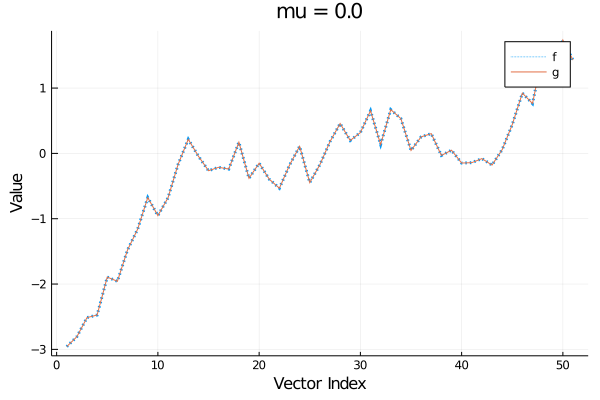

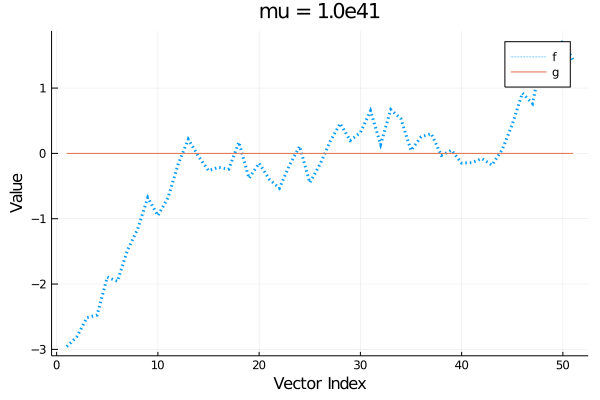

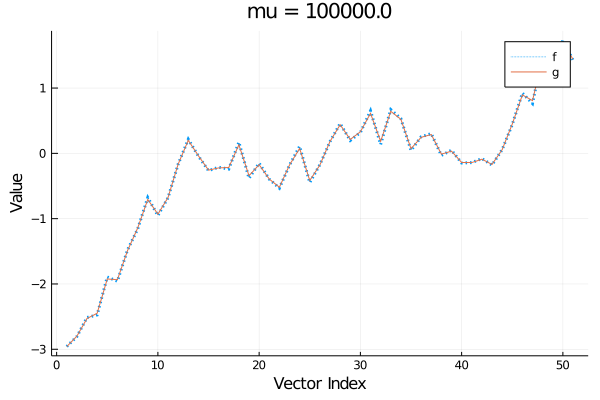

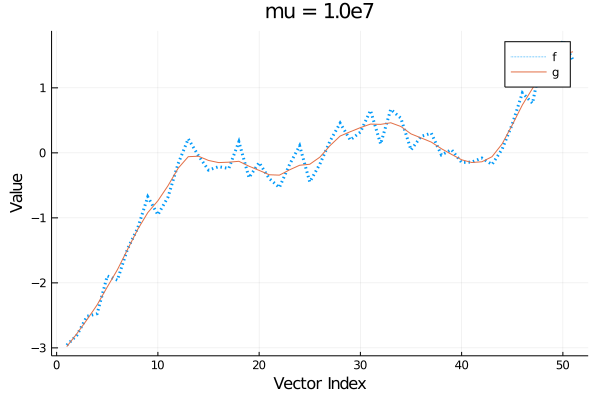

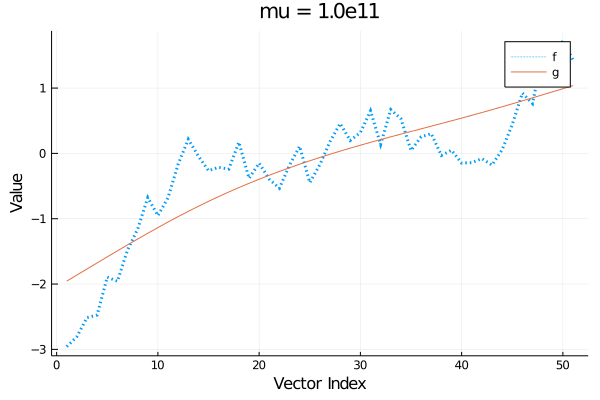

In [21]:
for mu = [0,10e40, 10e4, 10e6, 10e10]
    out = spline(f, B, mu);
    curve_plot = plot(1:51, f, linestyle = :dot, lw=3, label="f")
    plot!(1:51, out, label="g")
    xlabel!("Vector Index")
    ylabel!("Value")
    title!("mu = $(mu)")
    display(curve_plot)
end